# Importing Dataset

In [1]:
import pandas as pd

df = pd.read_csv("datasets\diabetes.csv")

df.head(5)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\athar\AppData\Local\Temp\ipykernel_4284\3743703143.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("datasets\diabetes.csv")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing Dataset

## Independent and Dependent varibles

In [2]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Splitting dataset

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feataure Scaling using StandardScalar

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Training our model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Setting the Optimizer with customer learning rate

In [7]:
optimizer = Adam(learning_rate=0.001)

## Early Stopping

In [8]:
early_stopping = EarlyStopping(
    monitor="val_loss", 
    min_delta = 0.0001, 
    patience = 20, 
    verbose = 5, 
    mode = "auto", 
    baseline = None, 
    restore_best_weights = True, 
    start_from_epoch = 0
)

## Creating the model architecture

In [9]:
model = Sequential(
    [
        Dense(units=64, input_shape=(8, ), activation='relu'), # Input Layer + 1st Hidden Layer
        Dense(units=1, activation='sigmoid') # Always sigmoid activation for binary classification
    ]
)

model.compile(
    optimizer=optimizer, 
    loss="binary_crossentropy", 
    metrics=['accuracy']
)

c:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_history = model.fit(
    X_train, 
    y_train, 
    validation_split = 0.33, 
    batch_size = 10, 
    epochs = 1000, 
    callbacks = [early_stopping]
)

Epoch 1/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4371 - loss: 5.9229 - val_accuracy: 0.5419 - val_loss: 1.5002
Epoch 2/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 1.2977 - val_accuracy: 0.5320 - val_loss: 1.1715
Epoch 3/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5905 - loss: 0.9680 - val_accuracy: 0.5665 - val_loss: 0.8762
Epoch 4/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6194 - loss: 0.8138 - val_accuracy: 0.6059 - val_loss: 0.7333
Epoch 5/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 0.6933 - val_accuracy: 0.6453 - val_loss: 0.7103
Epoch 6/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.8080 - val_accuracy: 0.5862 - val_loss: 0.8075
Epoch 7/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 1.0031 - val_accuracy: 0.6256 - val_loss: 0.6930
Epoch 8/1000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5715 - loss: 1.2681 - val_accuracy: 0.

In [11]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

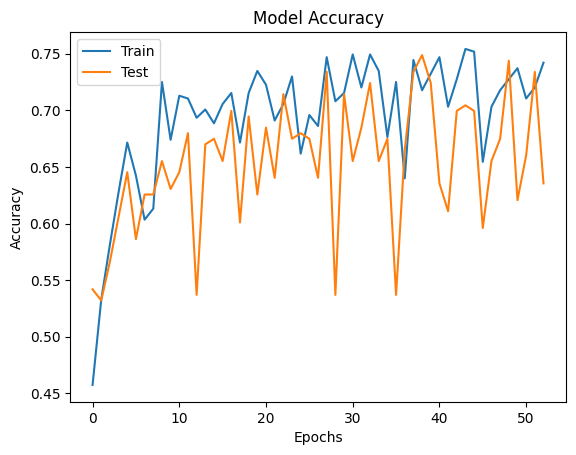

In [13]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

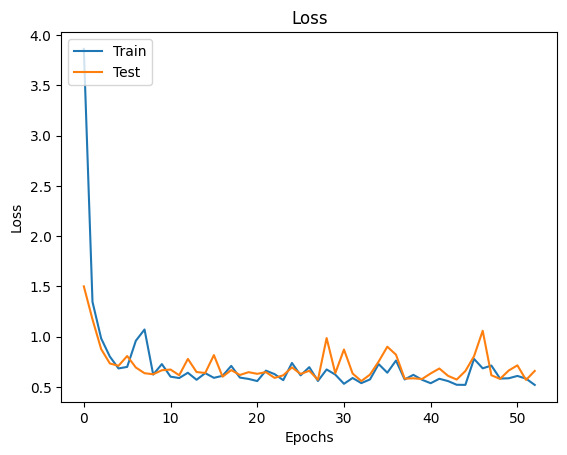

In [14]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

In [17]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

## Making Predictions

In [18]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[80, 19],
       [24, 31]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

score

0.7207792207792207